# Example 1

In [1]:
import jyrobot
import random

In [2]:
jyrobot.load_world()

Searching for jyrobot config files...
Directory: ./
    'experiment-01'
Directory: /home/dblank/jyrobot/jyrobot/worlds
    'duck-scribbler-no-walls'
    'two-scribblers-no-walls'
    'two-scribblers-one-wall'
    'two-scribblers'


In [3]:
world = jyrobot.load_world("two-scribblers-no-walls")

Random seed initialized to: 2131199


In [4]:
world.watch()

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x0…

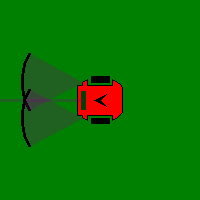

In [5]:
world.take_picture("red", size=200)

In [6]:
world.info()

This world was loaded from '/home/dblank/jyrobot/jyrobot/worlds/two-scribblers-no-walls.json'
Robots:
-------------------------
  robot[0 or 'Red']: <Robot(name='Red', position=430,50,3.14 v=0,0,0)>
      device[0 or 'camera']: <Camera size=(256,128), angle=60.0>
      device[1 or 'laser']: <RangeSensor angle=0.0, range=100, width=0.0>
      device[2 or 'ir']: <RangeSensor angle=0.0, range=20, width=57.3>
      device[3 or 'ir']: <RangeSensor angle=0.0, range=20, width=57.3>
  -------------------------
  robot[1 or 'White']: <Robot(name='White', position=30,50,0.0 v=0,0,0)>
      device[0 or 'camera']: <Camera size=(256,128), angle=60.0>
      device[1 or 'laser']: <RangeSensor angle=0.0, range=100, width=0.0>
      device[2 or 'ir']: <RangeSensor angle=0.0, range=20, width=57.3>
      device[3 or 'ir']: <RangeSensor angle=0.0, range=20, width=57.3>
  -------------------------


In [7]:
world["red"]["camera"]

<Camera size=(256,128), angle=60.0>

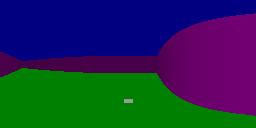

In [8]:
world["red"]["camera"].take_picture()

In [9]:
world[0].move(1, 0)
world[1].move(1, 0)

step = 0

def control(robot):
    global step
    if robot.stalled:
        robot.reverse()
    if random.random() < .1:
        robot.turn(1 - random.random() * 2)
    step += 1

In [10]:
world.save()

In [11]:
world.reset()

Reusing random seed: 2131199


In [12]:
recorder = world.record()

Reusing random seed: 2131199


In [13]:
robot = world[0]

In [14]:
robot.watch()

In [15]:
world.seconds(1, [control, control])


Simulation stopped at: 00:00:01.0; speed 0.93 x real time


In [16]:
world.seconds(200, [control, control], show=True, real_time=False)


Simulation stopped at: 00:03:21.0; speed 96.89 x real time


In [17]:
world.seconds(200, [control, control], show=False)


Simulation stopped at: 00:06:41.0; speed 131.47 x real time


In [18]:
world.seconds(200, [control, control], show=False, show_progress=False)

Simulation stopped at: 00:10:01.0; speed 172.67 x real time


In [19]:
recorder.world[0].watch(size=200)

Player(children=(VBox(children=(HBox(children=(FloatSlider(value=0.0, continuous_update=False, description='Ti…

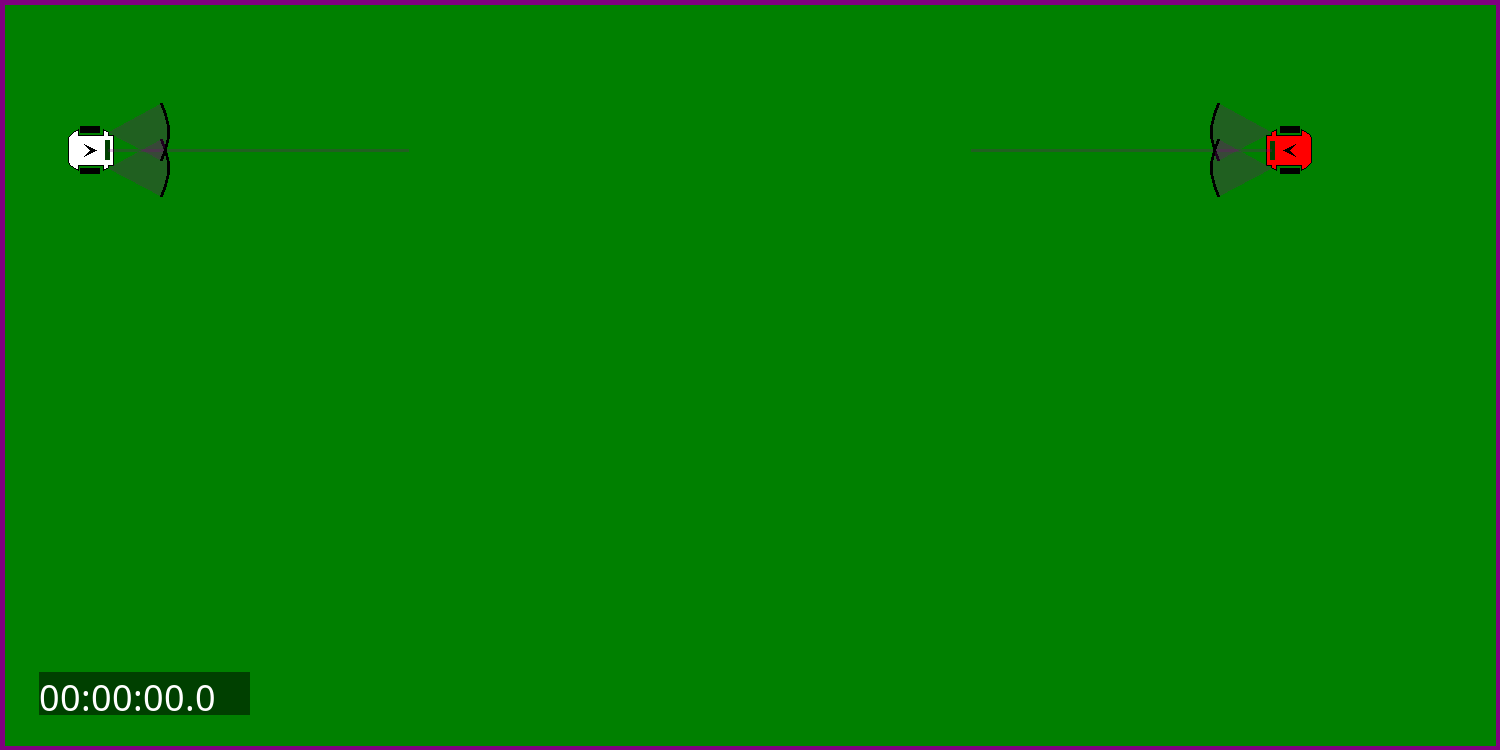

In [20]:
recorder.watch()

In [21]:
recorder.save_as(mp4=True, stop=201.0, step=1.0, duration=1000)

202it [00:17, 11.85it/s]


In [22]:
recorder.world["white"].watch()

In [23]:
recorder.world["red"]["camera"].watch()

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x00\x00\x00\x00\x80\x08\x06\x00\x00\x00\xe4\xb5\…

In [24]:
world.reset()

Reusing random seed: 9896046


# Example 2

In [24]:
import jyrobot
import time

In [25]:
w = jyrobot.World(width=500, height=500, ground_color="white", seed=10, scale=10)
w.watch()

Reusing random seed: 10


Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x0…

In [26]:
for i in range(20):
    robot = jyrobot.Scribbler(color="blue", name="Scribby-%s" % i)
    sensor = jyrobot.Camera()
    robot.add_device(sensor)
    w.add_robot(robot)
w.update()

In [27]:
from jyrobot.utils import Color
import random
for robot in w:
    robot.set_color( Color(
        255 * random.random(), 
        255 * random.random(), 
        255 * random.random(), 
   ))
w.update()

In [28]:
%%time
pics = []
for robot in w:
    pic = robot["camera"].take_picture()
    pics.append(pic)

CPU times: user 1.89 s, sys: 3.87 ms, total: 1.9 s
Wall time: 1.9 s


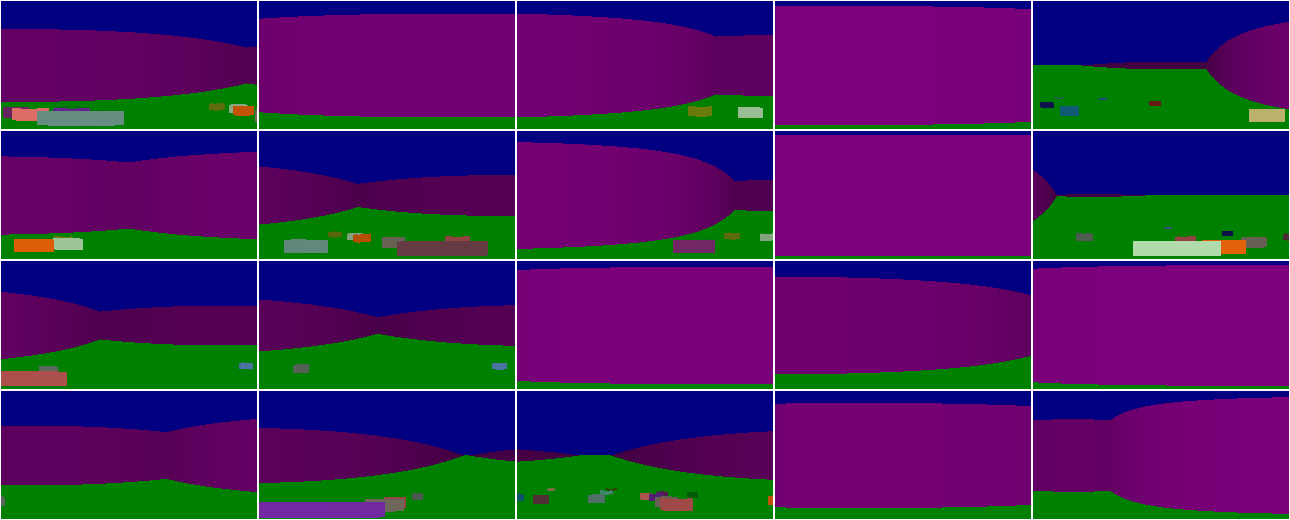

In [29]:
jyrobot.gallery(*pics)

In [30]:
%%time
pics = []
for i, robot in enumerate(w):
    pic = w.take_picture(i, size=200)
    pics.append(pic)

CPU times: user 3.4 ms, sys: 0 ns, total: 3.4 ms
Wall time: 2.24 ms


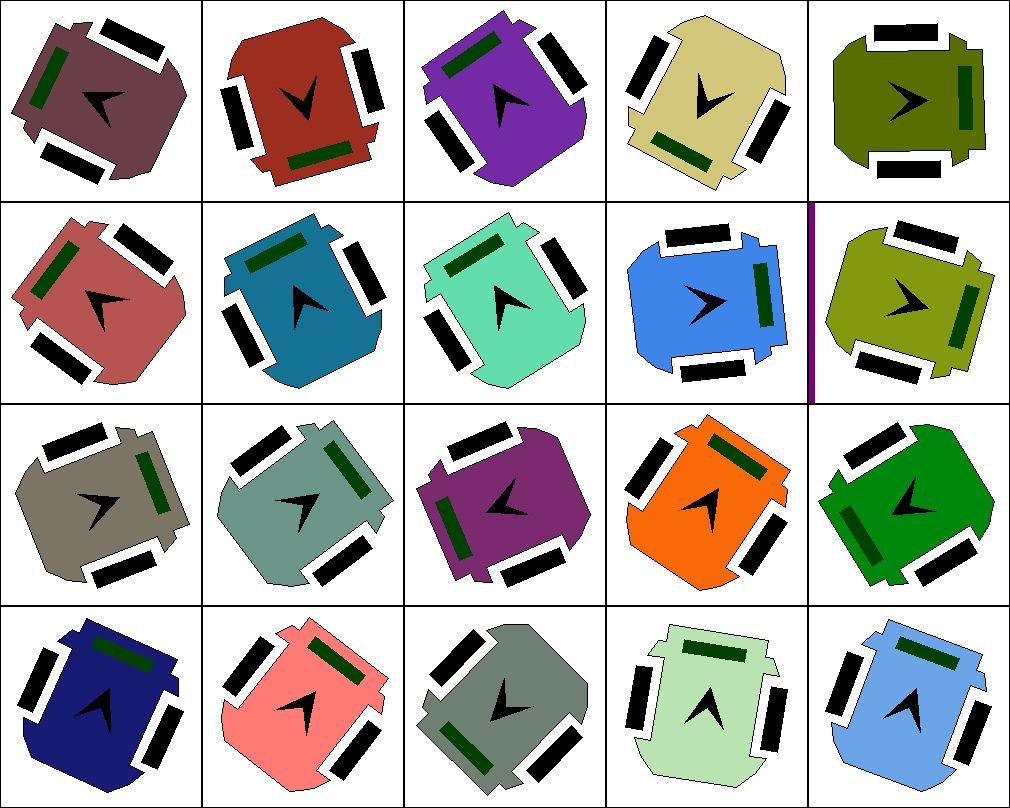

In [31]:
jyrobot.gallery(*pics, background_color="black")

In [32]:
for robot in w:
    robot.move(1,0)

In [33]:
def control(world):
    for robot in world:
        if robot.stalled:
            robot.reverse()
        robot.turn(1 - random.random() * 2)

In [34]:
w.run(control, show=True, real_time=False)


Simulation stopped at: 00:00:31.2; speed 4.61 x real time


# Example 3

In [35]:
import jyrobot as jr
import random

In [36]:
w = jr.World(width=100, height=100, scale=10)

Random seed initialized to: 375401


In [37]:
w.watch()

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x0…

In [38]:
r = jr.Scribbler()

In [39]:
w.add_robot(r)
w.draw()

In [40]:
sensor = jr.RangeSensor()

In [41]:
r.add_device(sensor)
w.update()

In [42]:
r.forward(1)

def control(world):
    for robot in world:
        if robot.stalled:
            robot.reverse()
        robot.turn(1 - random.random() * 2)

In [43]:
r.plot(lambda robot: (robot.x, robot.world.width - robot.y)).watch()

Figure(axes=[Axis(label='x', scale=LinearScale()), Axis(label='y', orientation='vertical', scale=LinearScale()…

In [44]:
w.seconds(.1, control, show=True, real_time=True)


Simulation stopped at: 00:00:00.1; speed 0.73 x real time


In [45]:
w.seconds(10, control, show=True, real_time=True)


Simulation stopped at: 00:00:09.4; speed 0.97 x real time


In [53]:
w.run(control, show=True, real_time=True)


Simulation stopped at: 00:00:38.4; speed 0.98 x real time


In [47]:
w.seconds(10, control, show=True, real_time=False)


Simulation stopped at: 00:00:23.9; speed 108.0 x real time


In [48]:
w.seconds(10, control, show=False)


Simulation stopped at: 00:00:33.9; speed 215.45 x real time


In [49]:
r.set_pose(50, 50, 180)

In [50]:
r.set_color("purple")

In [51]:
w.draw()

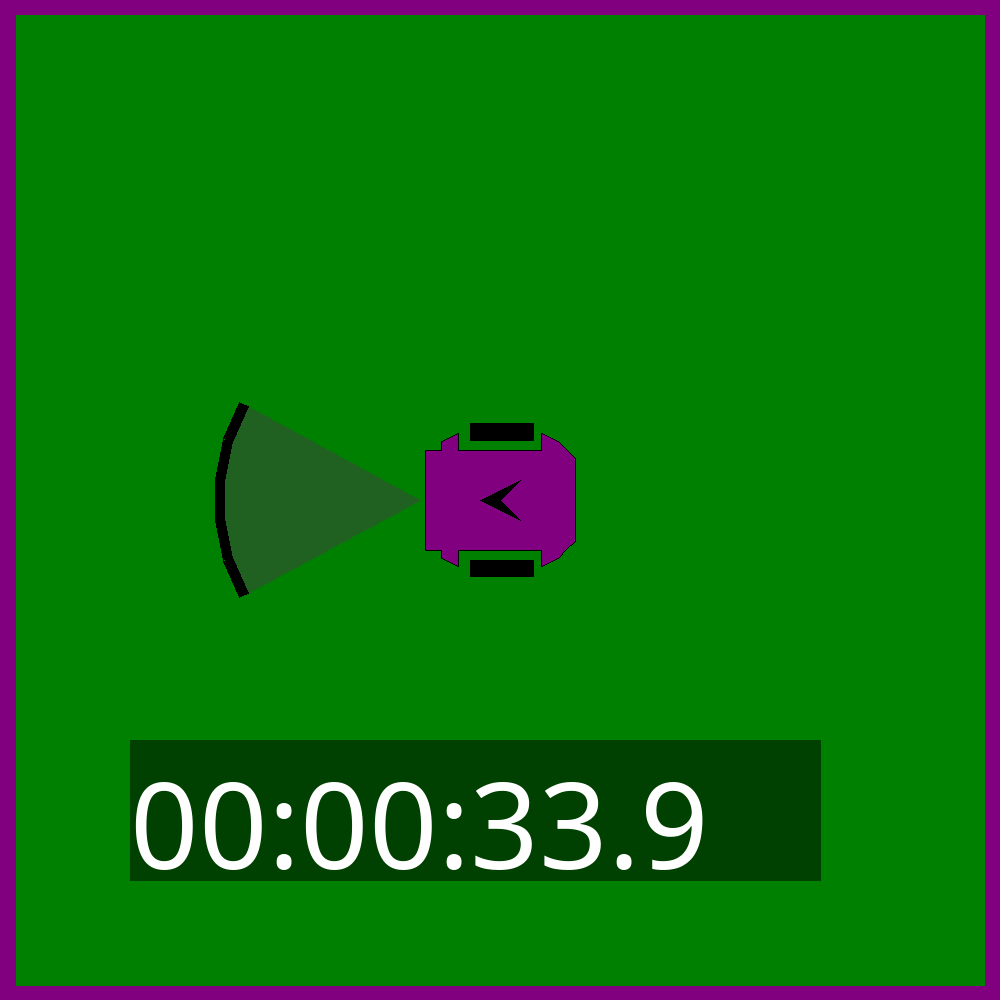

In [52]:
w.take_picture()